**HW3: LLP Simulated Data**  
Jeffrey Patrick, Phys 427  
January 28, 2020

In [2]:
import uproot
import pandas as pd
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
#open llp ROOT data files using uproot, gives me trees
file_1 = uproot.open("df_1.root")
file_2 = uproot.open("df_2.root")
file_3 = uproot.open("df_3.root")
file_4 = uproot.open("df_4.root")
file_5 = uproot.open("df_5.root")
file_6 = uproot.open("df_6.root")


#open trees to find leaves
file_1.keys()
file_2.keys()
file_3.keys()
file_4.keys()
file_5.keys()
file_6.keys()

tree1 = file_1["pandas_tree218"]
tree2 = file_2["pandas_tree51358"]
tree3 = file_3["pandas_tree53278"]
tree4 = file_4["pandas_tree52558"]
tree5 = file_5["pandas_tree53038"]
tree6 = file_6["pandas_tree54718"]

tree1 = tree1.pandas.df()
tree2 = tree2.pandas.df()
tree3 = tree3.pandas.df()
tree4 = tree4.pandas.df()
tree5 = tree5.pandas.df()
tree6 = tree6.pandas.df()

#creating 1 dataframe with all 6 tree dataframes
trees = [tree1, tree2, tree3, tree4, tree5, tree6]
all_trees = pd.concat(trees, keys=['df_1', 'df_2', 'df_3', 'df_4', 'df_5', 'df_6'])

df_1
#all_trees


/Users/stlp/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,RunNumber,EventNumber,JetPt,JetEta,JetPhi,IsLLP,nLLPs_Near_Jets,Lx,Ly,Lz,...,EH_CVL2,EH_TGL0,EH_TGL1,EH_TGL2,EH_EBL0,EH_EBL1,EH_EBL2,FC_L0,FC_L1,FC_L2
entry,,,,,,,,,,,,,,,,,,,,,
0,284500.0,2041602.0,50.151355,1.767030,0.074290,True,1,1851.684326,178.223892,5354.035156,...,0.000000,0.000000,0.000000,0.000000,0.019344,0.000731,0.000000,0.0,0.0,0.0
1,284500.0,2041537.0,45.315016,1.088594,0.364831,False,0,0.000000,0.000000,0.000000,...,-0.000409,0.007784,-0.000218,0.174103,0.006951,0.000300,0.000130,0.0,0.0,0.0
2,284500.0,2159562.0,163.244844,1.709549,2.769850,True,1,609.158691,239.010056,1741.357788,...,0.000000,0.000000,0.000000,0.000000,0.004981,-0.000061,0.000000,0.0,0.0,0.0
3,284500.0,2159562.0,147.121187,-0.237002,-0.393413,False,0,0.000000,0.000000,0.000000,...,-0.000283,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,284500.0,2159739.0,54.661199,-0.730161,-2.550338,False,0,0.000000,0.000000,0.000000,...,0.010581,0.000009,-0.000370,-0.002349,0.000000,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22571,284500.0,2155029.0,76.296273,1.114254,-1.709045,True,1,259.214996,2172.912354,3113.421875,...,0.000097,0.003310,-0.000572,0.520124,0.112565,0.300919,0.028937,0.0,0.0,0.0
22572,284500.0,2041233.0,53.958059,0.729737,2.172977,True,1,499.816559,714.238342,664.080627,...,0.035989,0.000156,0.000345,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
22573,284500.0,2041233.0,44.355902,-1.914020,-1.443047,False,0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


The $L_x, L_y, and L_z$ columns describe the decay lengths in each respective direction for a long lived particle which is tunneling from a high energy state to a lower energy state. $L_x, L_y, L_z$ are all equal to zero when IsLLP is false.

The IsLLP column tells us whether or not there is an long lived particle in the Jet that we are analyzing with each row representing a particular Jet.

The $Jetp_t$ column describes the Jet's transversal momentum. $Jet_\eta$ is the Jet's pseudorapidity which tells us the particle's angle with respect to the beam axis. $Jet_\phi$ tells us the angle between the Jet's momentum and the beam axis.

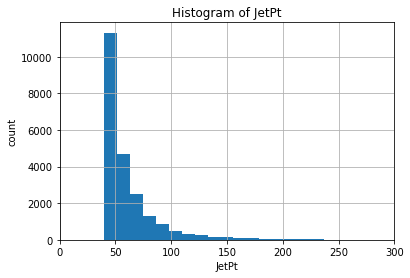

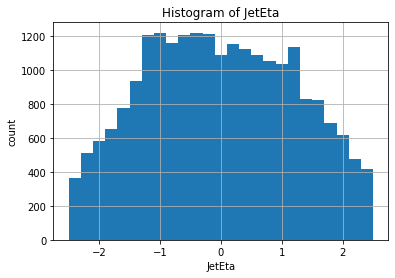

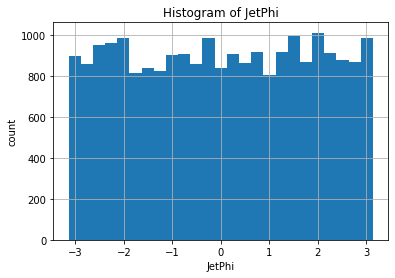

In [77]:
#histograms of the the Jet columns from data_1

Jet1hist = df_1.hist("JetPt", bins=75)
pl.title("Histogram of JetPt")
pl.xlabel("JetPt")
pl.xlim([0, 300])
pl.ylabel("count")

Jet2hist = df_1.hist("JetEta", bins=25)
pl.title("Histogram of JetEta")
pl.xlabel("JetEta")
pl.ylabel("count")

Jet3hist = df_1.hist("JetPhi", bins=25)
pl.title("Histogram of JetPhi")
pl.xlabel("JetPhi")
pl.ylabel("count")
plt.show()

Text(0, 0.5, 'count')

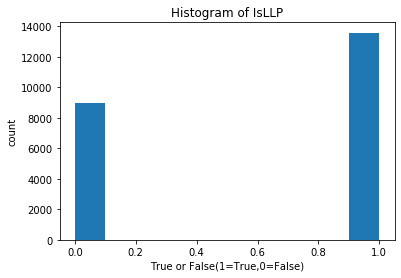

In [78]:
#Histogram of IsLLP

df_1.IsLLP.value_counts()
plt.hist(df_1.IsLLP.astype(int))
plt.title('Histogram of IsLLP')
plt.xlabel('True or False(1=True,0=False)')
plt.ylabel('count')

Text(0, 0.5, 'count')

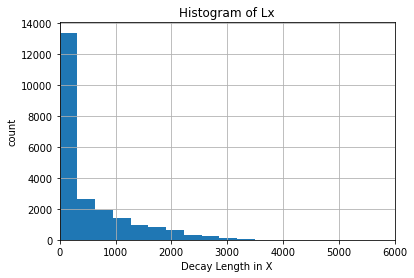

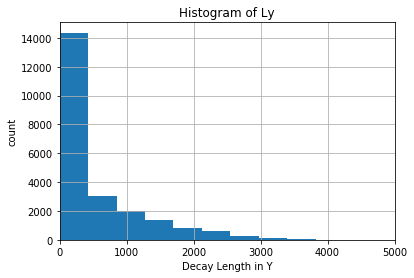

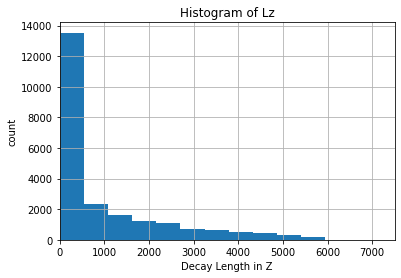

In [79]:
#Histograms of decay lengths in all directions
Lx_hist = df_1.hist("Lx", bins=50)
pl.title("Histogram of Lx")
pl.xlabel("Decay Length in X")
pl.xlim([0, 6000])
pl.ylabel("count")

Ly_hist = df_1.hist("Ly", bins=50)
pl.title("Histogram of Ly")
pl.xlabel("Decay Length in Y")
pl.xlim([0, 5000])
pl.ylabel("count")

Lz_hist = df_1.hist("Lz", bins=50)
pl.title("Histogram of Lz")
pl.xlabel("Decay Length in Z")
pl.xlim([0, 7500])
pl.ylabel("count")

In [80]:
#Create arrays of columns Lx, Ly, and Lz
Lx = df_1['Lx']
#print(Lx)
Ly = df_1['Ly']
#print(Ly)
Lz = df_1['Lz']
#print(Lz)

#combining columns to get L(x,y) and L(x,y,z)
L_T = (Lx*Lx + Ly*Ly)**0.5

L_3D = (Lx*Lx +Ly*Ly + Lz*Lz)**0.5


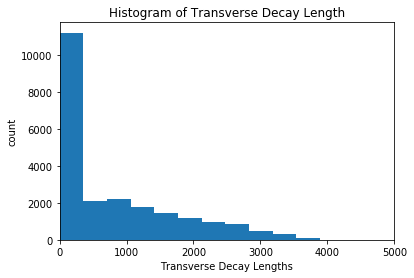

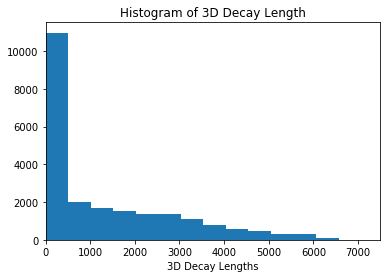

In [81]:
#Histograms of L transverse and L 3D

plt.hist(L_T, bins = 75)
plt.title('Histogram of Transverse Decay Length')
plt.xlabel('Transverse Decay Lengths')
plt.ylabel('count')
plt.xlim([0, 5000])
plt.show()

plt.hist(L_3D, bins = 75)
plt.title('Histogram of 3D Decay Length')
plt.xlabel('3D Decay Lengths')
plt.xlim([0, 7500])
plt.show()

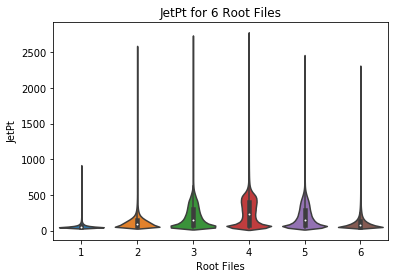

In [131]:
#violin plot of the JetPt column when all data files are combined
JetPt1 = tree1["JetPt"]
JetPt2 = tree2["JetPt"]
JetPt3 = tree3["JetPt"]
JetPt4 = tree4["JetPt"]
JetPt5 = tree5["JetPt"]
JetPt6 = tree6["JetPt"]


ax = sns.violinplot(data = [JetPt1, JetPt2, JetPt3, JetPt4, JetPt5, JetPt6], scale="width")
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_xticklabels(['1', '2', '3', '4', '5', '6'])
ax.set_title('JetPt for 6 Root Files')
ax.set_xlabel('Root Files')
ax.set_ylabel('JetPt')
plt.show()


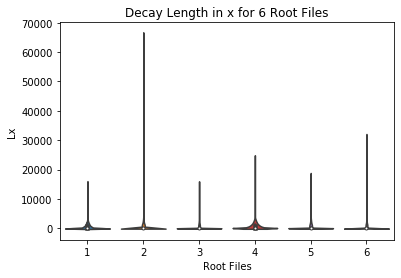

In [83]:
#decay length in x
Lx1 = tree1["Lx"]
Lx2 = tree2["Lx"]
Lx3 = tree3["Lx"]
Lx4 = tree4["Lx"]
Lx5 = tree5["Lx"]
Lx6 = tree6["Lx"]

ax = sns.violinplot(data = [Lx1, Lx2, Lx3, Lx4, Lx5, Lx6], scale = "width")
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_xticklabels(['1', '2', '3', '4', '5', '6'])
ax.set_title('Decay Length in x for 6 Root Files')
ax.set_xlabel('Root Files')
ax.set_ylabel('Lx')
plt.show()

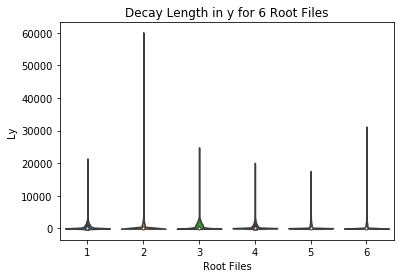

In [84]:
#decay length in y
Ly1 = tree1["Ly"]
Ly2 = tree2["Ly"]
Ly3 = tree3["Ly"]
Ly4 = tree4["Ly"]
Ly5 = tree5["Ly"]
Ly6 = tree6["Ly"]

ax = sns.violinplot(data = [Ly1, Ly2, Ly3, Ly4, Ly5, Ly6], scale = "width")
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_xticklabels(['1', '2', '3', '4', '5', '6'])
ax.set_title('Decay Length in y for 6 Root Files')
ax.set_xlabel('Root Files')
ax.set_ylabel('Ly')
plt.show()

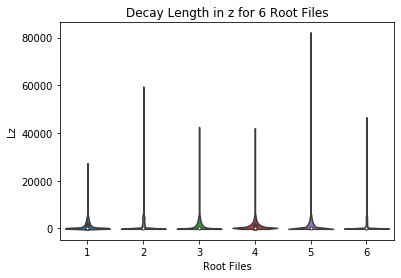

In [85]:
#decay length in z
Lz1 = tree1["Lz"]
Lz2 = tree2["Lz"]
Lz3 = tree3["Lz"]
Lz4 = tree4["Lz"]
Lz5 = tree5["Lz"]
Lz6 = tree6["Lz"]

ax = sns.violinplot(data = [Lz1, Lz2, Lz3, Lz4, Lz5, Lz6], scale = "width")
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_xticklabels(['1', '2', '3', '4', '5', '6'])
ax.set_title('Decay Length in z for 6 Root Files')
ax.set_xlabel('Root Files')
ax.set_ylabel('Lz')
plt.show()

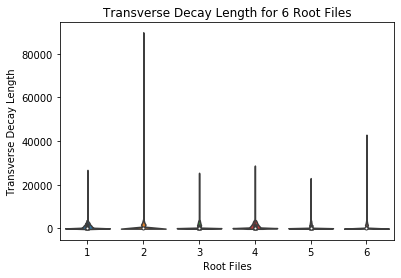

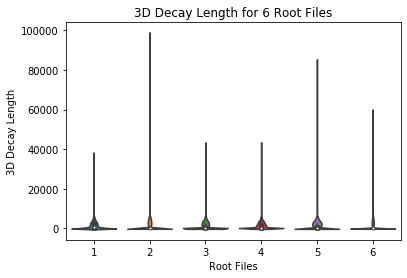

In [107]:
#Violin plots of Transverse and 3D decay lengths
L_T1 = (Lx1*Lx1 + Ly1*Ly1)**0.5
L_T2 = (Lx2*Lx2 + Ly2*Ly2)**0.5
L_T3 = (Lx3*Lx3 + Ly3*Ly3)**0.5
L_T4 = (Lx4*Lx4 + Ly4*Ly4)**0.5
L_T5 = (Lx5*Lx5 + Ly5*Ly5)**0.5
L_T6 = (Lx6*Lx6 + Ly6*Ly6)**0.5


L_3D1 = (Lx1*Lx1 + Ly1*Ly1 + Lz1*Lz1)**0.5
L_3D2 = (Lx2*Lx2 + Ly2*Ly2 + Lz2*Lz2)**0.5
L_3D3 = (Lx3*Lx3 + Ly3*Ly3 + Lz3*Lz3)**0.5
L_3D4 = (Lx4*Lx4 + Ly4*Ly4 + Lz4*Lz4)**0.5
L_3D5 = (Lx5*Lx5 + Ly5*Ly5 + Lz5*Lz5)**0.5
L_3D6 = (Lx6*Lx6 + Ly6*Ly6 + Lz6*Lz6)**0.5


ax = sns.violinplot(data = [L_T1, L_T2, L_T3, L_T4, L_T5, L_T6], scale = "width")
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_xticklabels(['1', '2', '3', '4', '5', '6'])
ax.set_title('Transverse Decay Length for 6 Root Files')
ax.set_ylabel('Transverse Decay Length')
ax.set_xlabel('Root Files')
plt.show()

ax = sns.violinplot(data = [L_3D1, L_3D2, L_3D3, L_3D4, L_3D5, L_3D6], scale = "width")
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_xticklabels(['1', '2', '3', '4', '5', '6'])
ax.set_title('3D Decay Length for 6 Root Files')
ax.set_xlabel('Root Files')
ax.set_ylabel('3D Decay Length')
plt.show()

In [130]:
#trying to melt together 2 columns of root files, assigning IsLLP values to their respective JetPt
#Jets_IsLLP1 = pd.melt(tree1, id_vars=['JetPt'], value_vars=['IsLLP'], var_name='IsLLP', value_name='True or False')
#Jets_IsLLP2 = pd.melt(tree2, id_vars=['JetPt'], value_vars=['IsLLP'], var_name='IsLLP', value_name='True or False')
#Jets_IsLLP3 = pd.melt(tree3, id_vars=['JetPt'], value_vars=['IsLLP'], var_name='IsLLP', value_name='True or False')
#Jets_IsLLP4 = pd.melt(tree4, id_vars=['JetPt'], value_vars=['IsLLP'], var_name='IsLLP', value_name='True or False')
#Jets_IsLLP5 = pd.melt(tree5, id_vars=['JetPt'], value_vars=['IsLLP'], var_name='IsLLP', value_name='True or False')
#Jets_IsLLP6 = pd.melt(tree6, id_vars=['JetPt'], value_vars=['IsLLP'], var_name='IsLLP', value_name='True or False')

#converting the IsLLP values to floats

#Jets_IsLLP6_int
#ax = sns.violinplot(x="JetPt", y = "IsLLP", data = [Jets_IsLLP1_int, Jets_IsLLP2_int, Jets_IsLLP3_int, Jets_IsLLP4_int, Jets_IsLLP5_int, Jets_IsLLP6_int])
